In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import torch
from vae_interp.vae import VAE
from vae_interp.dataset import load_nouns_dataset
import matplotlib.pyplot as plt
import numpy as np
from vae_interp.utils import interpolate_vae_latents
import matplotlib.pyplot as plt

In [3]:
vae = VAE(in_channels=3, num_hiddens=[32, 64], latent_dim=4)

In [4]:
x = torch.randn(1, 3, 32, 32)

In [5]:
vae(x)

{'recon': tensor([[[[ 9.5811e-02,  2.0899e-02,  1.9782e-01,  ...,  1.7595e-01,
             2.1392e-02,  2.3667e-01],
           [ 4.8053e-01,  7.7600e-03,  3.0431e-01,  ...,  1.5525e-01,
             1.0522e-01,  1.4669e-01],
           [ 7.0391e-01,  4.4757e-02,  4.9162e-01,  ...,  2.3569e-01,
             5.0717e-01,  1.0746e-01],
           ...,
           [ 3.7057e-01,  4.1887e-01,  5.2715e-01,  ...,  6.1396e-01,
             4.3981e-02,  1.3671e-01],
           [ 2.2065e-01,  4.1293e-01,  4.4669e-01,  ...,  1.0216e-01,
             1.5530e-01,  1.1398e-01],
           [ 2.1342e-01, -3.6918e-01,  4.3459e-01,  ..., -1.8674e-01,
             1.1662e-01,  1.1109e-02]],
 
          [[-1.5613e-01,  1.2141e-01, -5.7563e-02,  ..., -8.4270e-02,
             3.7511e-01,  1.5462e-02],
           [ 2.1331e-01,  7.8993e-02, -2.0602e-01,  ...,  2.7421e-01,
             1.3976e-01, -2.4510e-02],
           [-7.3474e-02,  4.9741e-01, -1.4348e-01,  ...,  8.6627e-01,
             3.6597e-01,  2.05

In [5]:
dataset = load_nouns_dataset(image_size=64, normalize=True)

In [9]:
def evaluate(model, dataset):
    model.eval()
    with torch.no_grad():
        # Get a batch of images
        images = torch.stack([dataset[i] for i in range(25)], dim=0)

        print(images.shape)

        # Reconstruct images
        reconstructed = model(images)["recon"]

        print(reconstructed.shape)

        # Create a pyplot figure
        fig, axes = plt.subplots(5, 10, figsize=(20, 10))
        fig.suptitle(f"Original vs Reconstructed (Iteration)")

        for i in range(25):
            # Original image
            ax = axes[i // 5, (i % 5) * 2]
            img = images[i].cpu().permute(1, 2, 0).numpy()
            img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]
            ax.imshow(img)
            ax.axis("off")
            if i < 5:
                ax.set_title("Original")

            # Reconstructed image
            ax = axes[i // 5, (i % 5) * 2 + 1]
            img = reconstructed[i].cpu().permute(1, 2, 0).numpy()
            img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]
            ax.imshow(img)
            ax.axis("off")
            if i < 5:
                ax.set_title("Recon")

        plt.tight_layout()

        # Convert plot to image
        fig.canvas.draw()
        plot_image = torch.from_numpy(
            np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        )
        plot_image = plot_image.view(fig.canvas.get_width_height()[::-1] + (3,))
        plot_image = plot_image.permute(2, 0, 1)

  

        # plt.close(fig)

torch.Size([25, 3, 128, 128])
torch.Size([25, 3, 128, 128])


/tmp/ipykernel_152254/2760991701.py:42: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


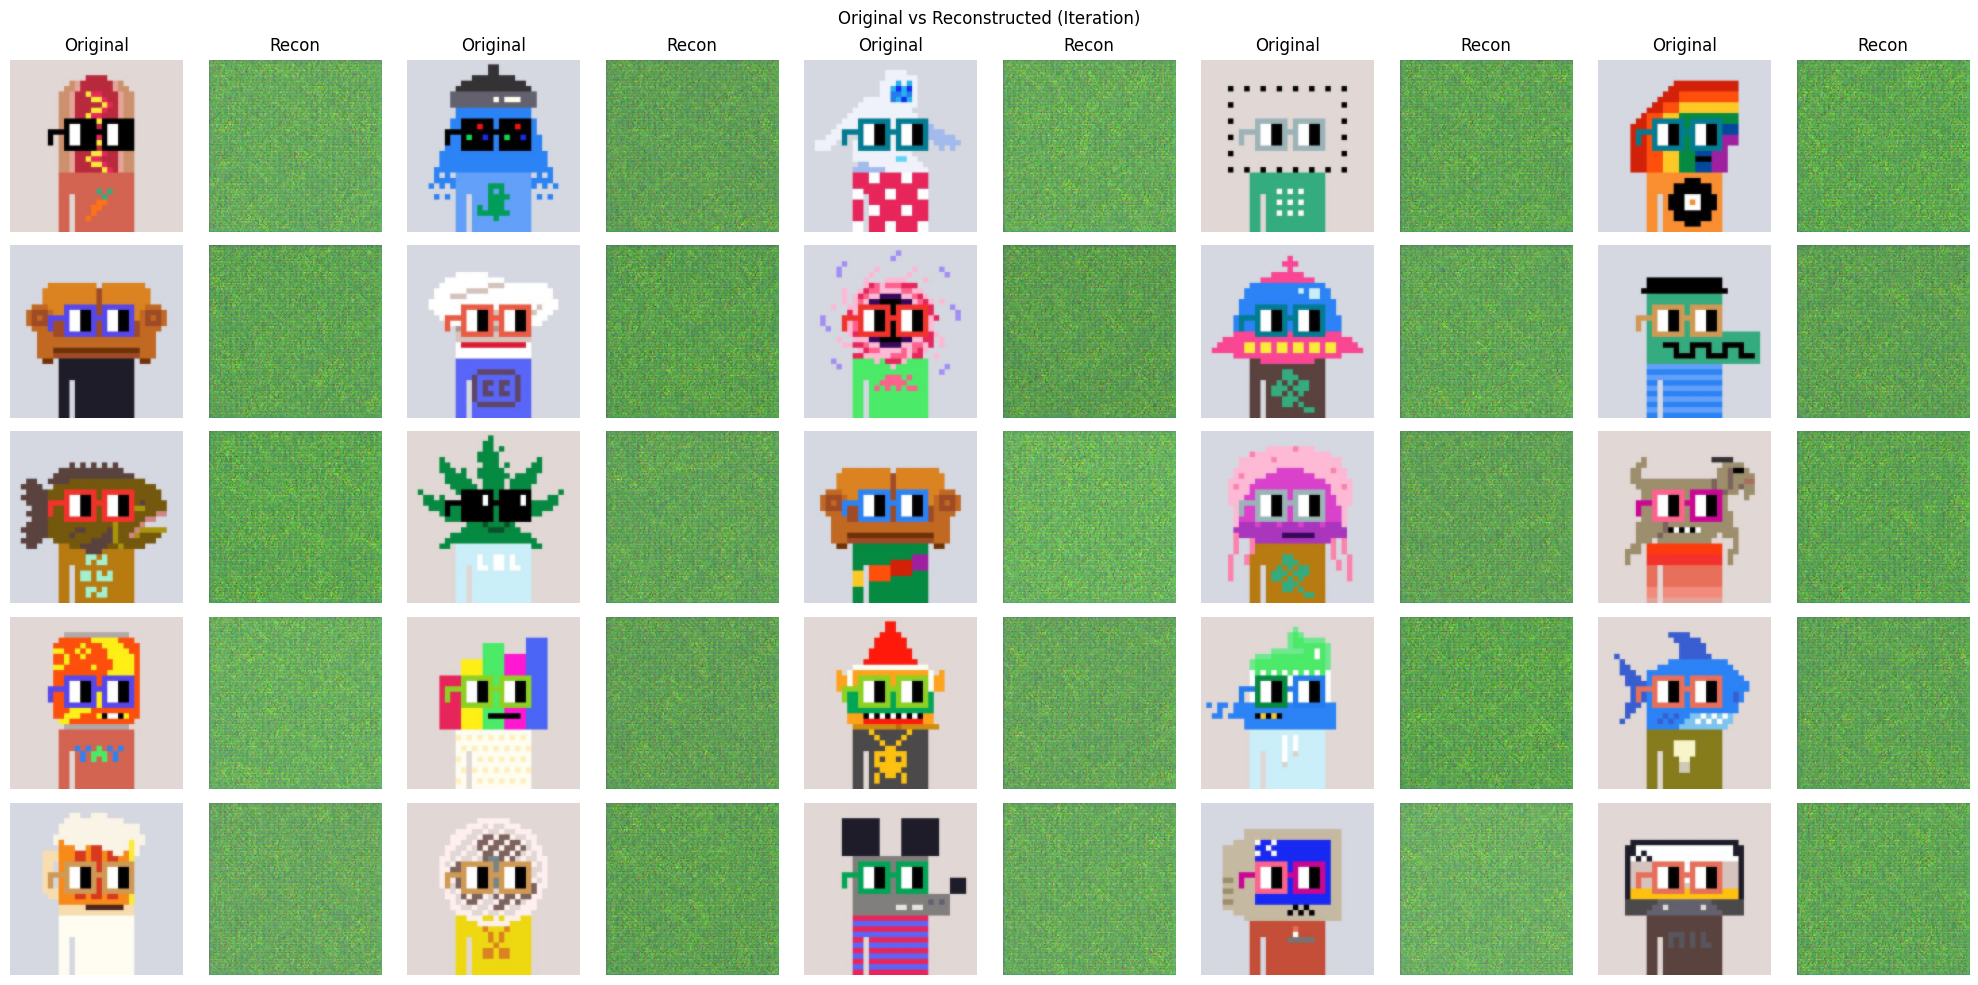

In [10]:
evaluate(vae, dataset)

In [3]:
config_path = "./checkpoints/test2/config.json"
weights_path = "./checkpoints/test2/vae.pth"

vae = VAE.load_from_checkpoint(config_path, weights_path)

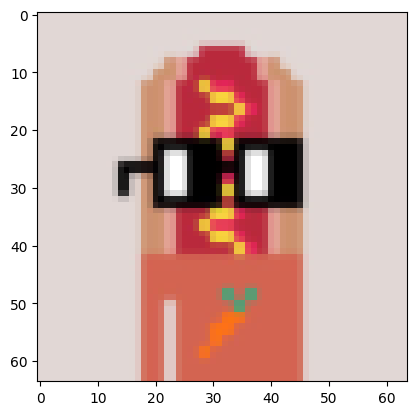

In [40]:
import random
from torch.utils.data import DataLoader

# select 2 random images from dataset
# image1 = dataset[random.randint(0, len(dataset))]
image1 = dataset[0]
image2 = dataset[random.randint(0, len(dataset))]

plt.imshow((image1.permute(1, 2, 0) + 1) * 0.5)

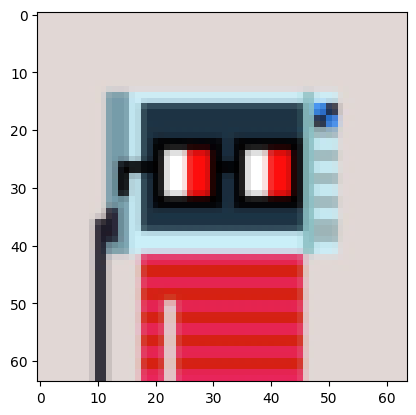

In [37]:
plt.imshow((image2.permute(1, 2, 0) + 1) * 0.5)

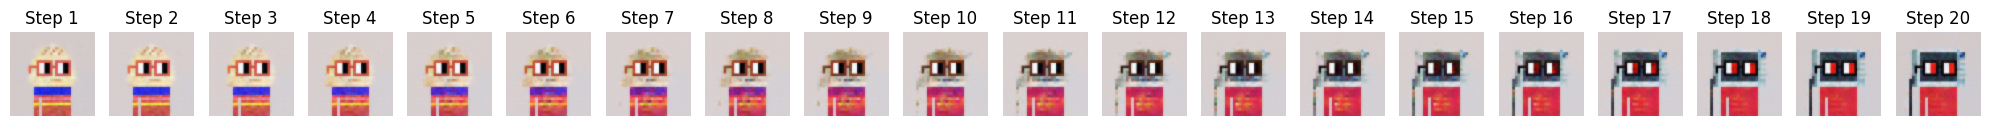

In [38]:
interpolate_vae_latents(
    vae,
    image1,
    image2,
    num_steps=20,
)

In [41]:
dataloader = DataLoader(dataset, batch_size=25, shuffle=False)   

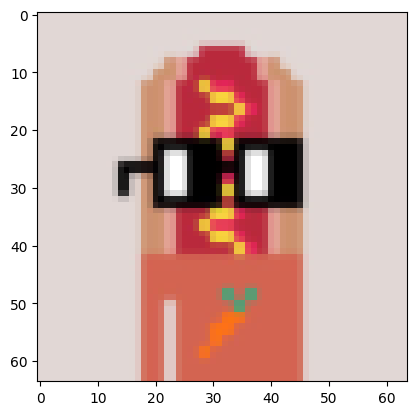

In [42]:
for x in dataloader:
    image = x[0]
    plt.imshow((image.permute(1, 2, 0) + 1) * 0.5)
    break